# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [ ]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

<ipython-input-3-929a7e766d9c>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data ML/Credit Risk/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat ukuran dataset
df.shape

(466285, 75)

In [ ]:
# Melihat Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
# Melihat sebaran statistik dataset

df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


<ipython-input-7-148d7dc37605>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')


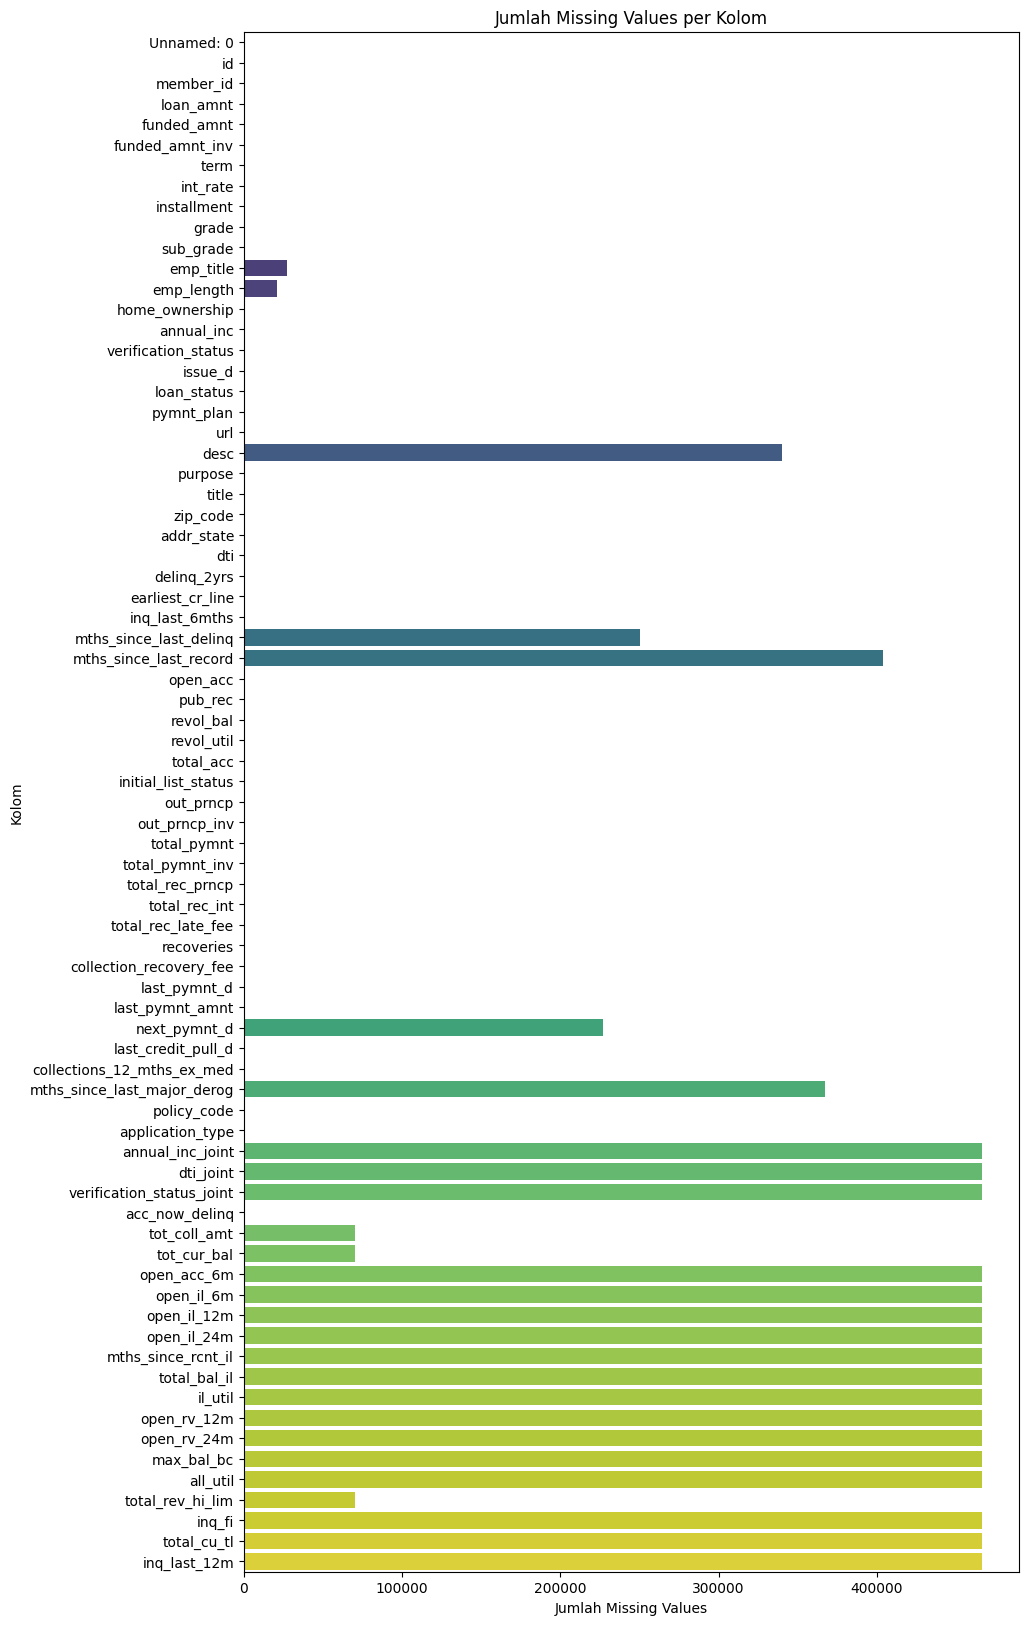

In [ ]:
# Menghitung jumlah missing values
missing_values = df.isnull().sum()
# Mengurutkan berdasarkan jumlah missing values
missing_values_sorted = missing_values.sort_values(ascending=False)


# Membuat plot
plt.figure(figsize=(10, 20))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Jumlah Missing Values per Kolom')
plt.xlabel('Jumlah Missing Values')
plt.ylabel('Kolom')
plt.show()

In [ ]:
# Melihat jumlah missing value
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

Terdapat 40 kolom yang memiliki missing value dan nantinya akan di drop kolom kolom yang memiliki missing value lebih dari 80%

In [ ]:
# Mengecek data duplikat
df.duplicated().sum()

0

## Inisialisasi Target

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)


*   Current = Pembayaran lancar
*   Fully Paid = Pembayaran Lunas


*   Charged Off = Pembayaran Macet dan dihapus buku kan

*   Late = Pembayaran telat
*   In Grace Period = Dalam Masa tenggang


*   Doesnt Meet... Fully paid = Lunas tapi tidak mengikuti kebijakan yang berlaku


*   Default = Pembayaran macet
*   Doesnt Meet... Charged Off = Pembayaran macet dan tidak mengikuti kebijakan yang berlaku

Untuk kasus ini, jika pembayaran lebih dari 30 hari, maka dia masuk kategori bad loan.

In [ ]:
df['good_bad_loan'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                                   'Does not meet the credit policy. Status:Charged Off',
                                                                   'Late (31-120 days)']), 0, 1)

In [ ]:
df['good_bad_loan'].value_counts()

good_bad_loan
1    415317
0     50968
Name: count, dtype: int64

In [ ]:
# menghapus kolom loan_status
df.drop('loan_status', axis = 1, inplace = True)

Menginisalisasikan pinjaman yang buruk dengan '0' dan pinjaman baik dengan '1'.

# EDA

In [ ]:
numeric_features = list(df.select_dtypes(["float64" , "int64",'int32']).columns)
n = numeric_features.index('good_bad_loan')
del n

categorical_features = list(df.select_dtypes("object").columns)

target = "good_bad_loan"

## Univariate analysis for numeric column

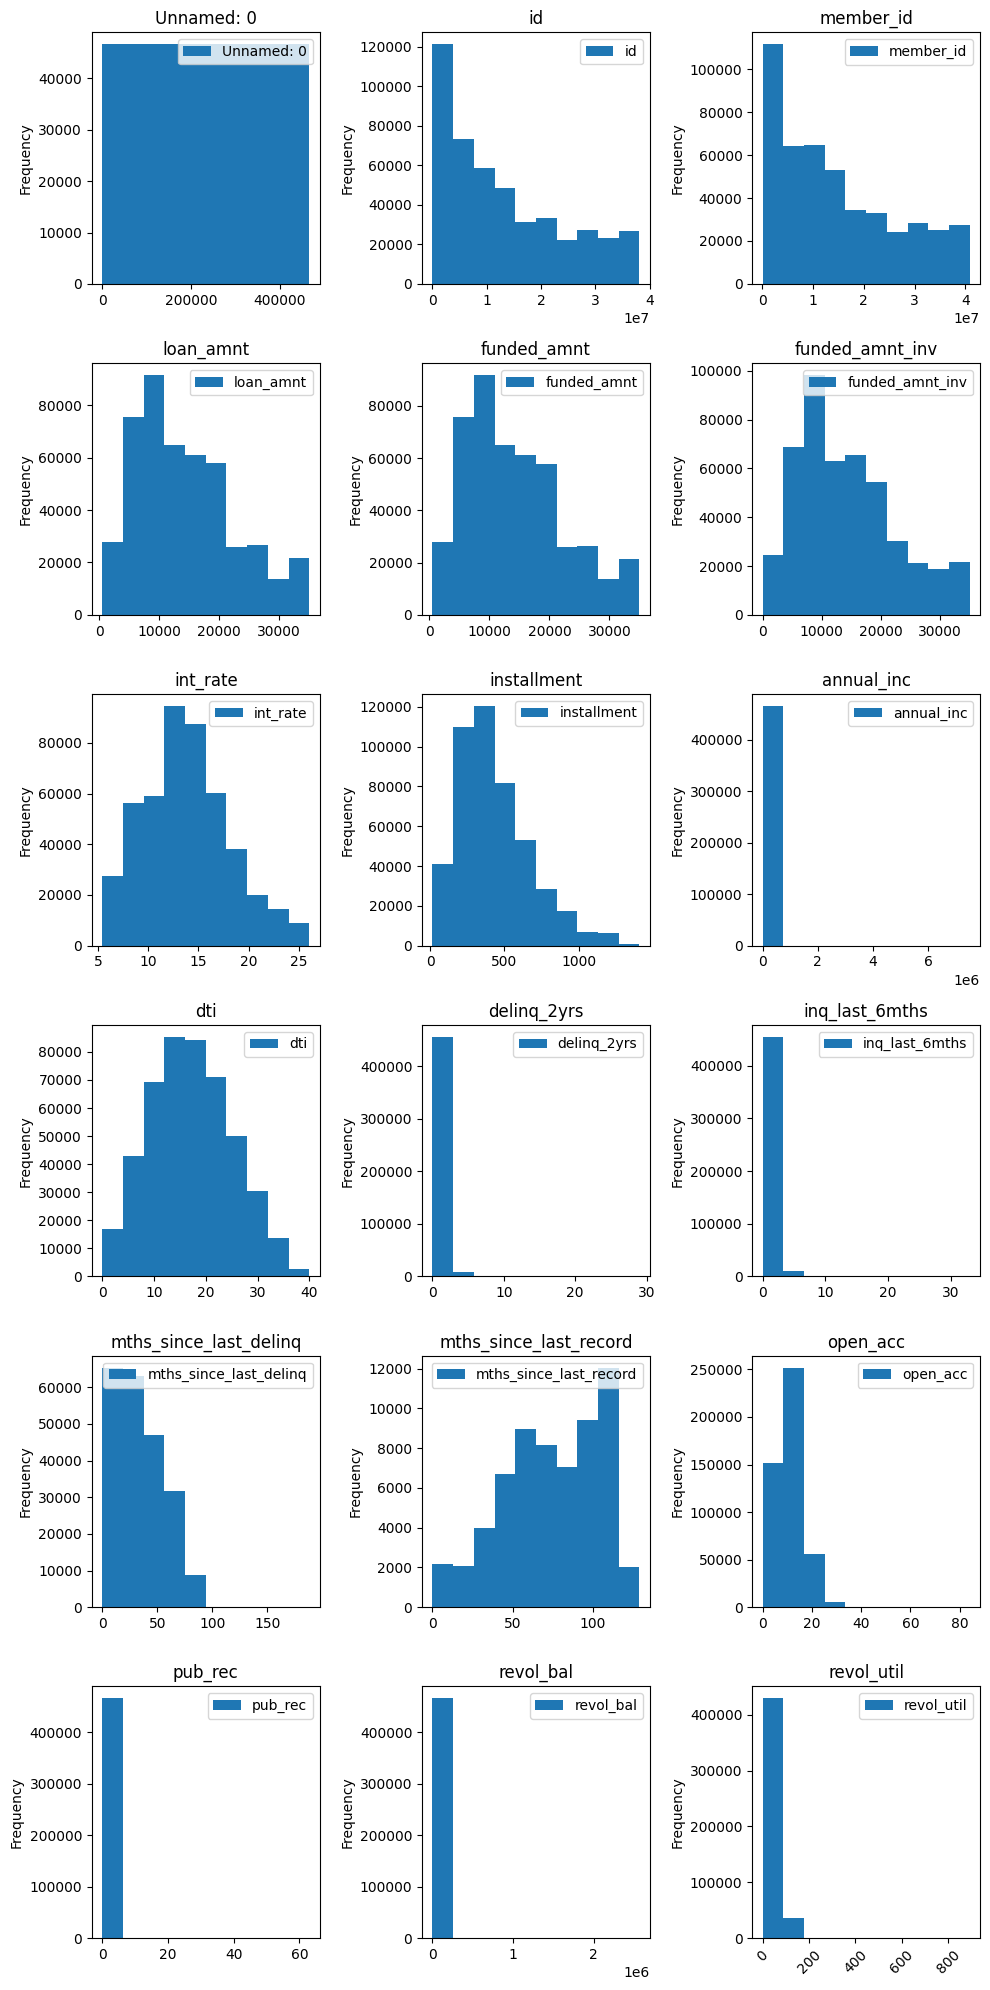

In [ ]:
fig,ax = plt.subplots(6,3,figsize=(10,20) ,)
row = col = 0
for n,i in enumerate(numeric_features):

    try:

        if (n%3 == 0) & (n > 0):
            row += 1
            col = 0
        df[i].plot(kind="hist",ax=ax[row,col],legend=target)
        ax[row,col].set_title(i)
        col += 1

    except:
        pass

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Univariate analysis for categoric column

<ipython-input-16-564f1164d516>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df[i].value_counts().index[:5], y=df[i].value_counts().values[:5],ax=subplots , palette='Spectral')
<ipython-input-16-564f1164d516>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-16-564f1164d516>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df[i].value_counts().index[:5], y=df[i].value_counts().values[:5],ax=subplots , palette='Spectral')
<ipython-input-16-564f1164d516>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=

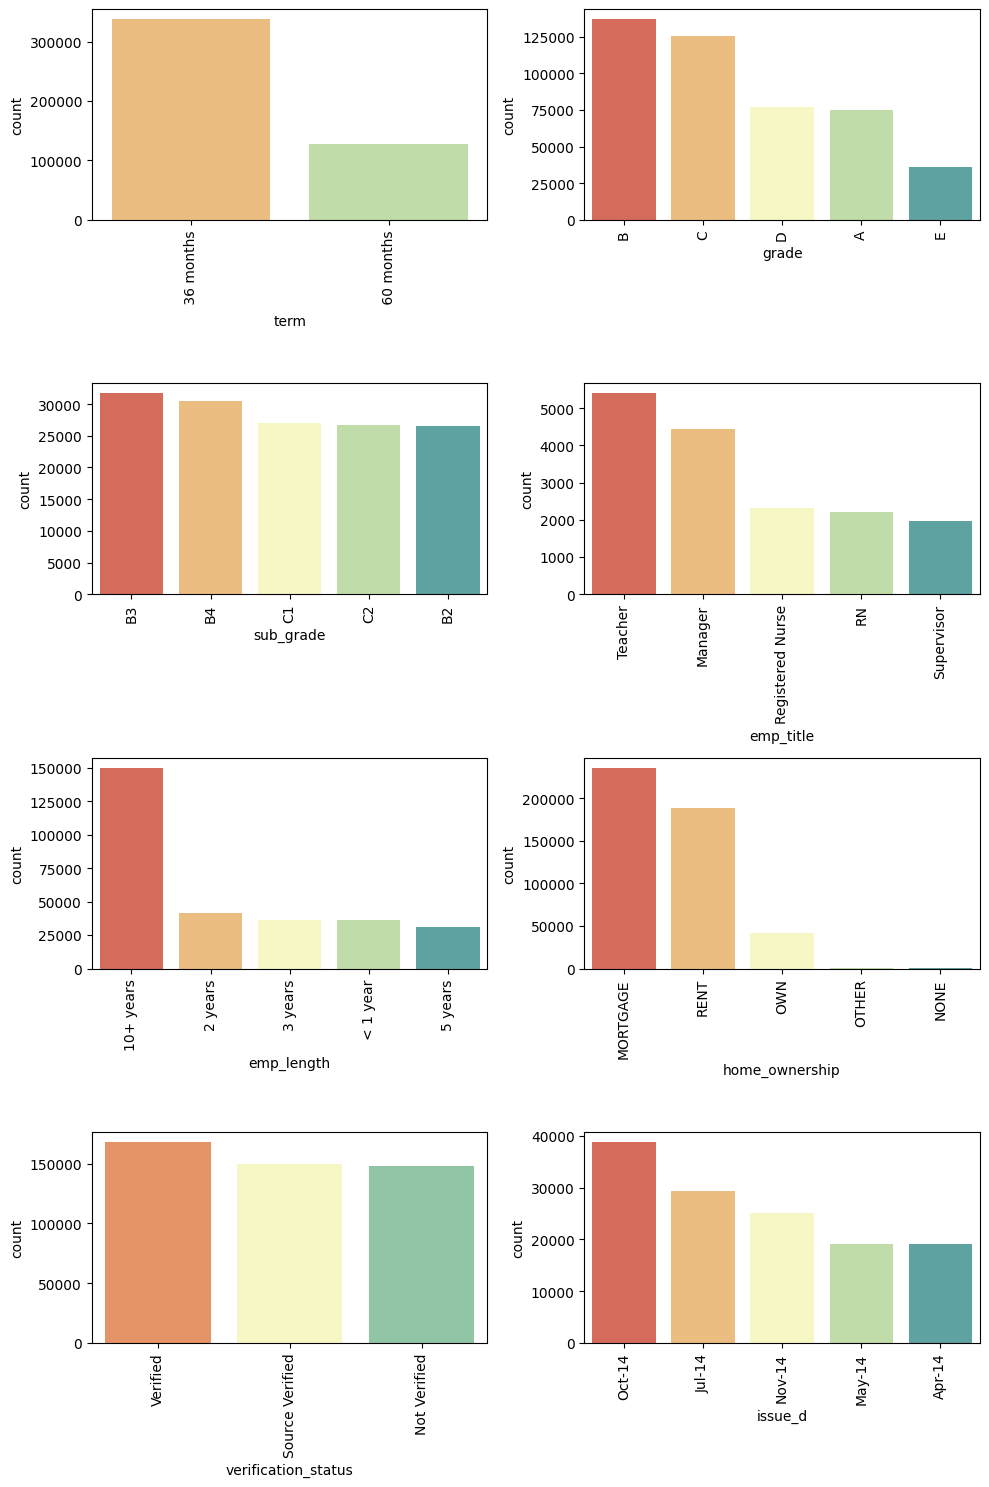

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 15))

for i, subplots in zip(categorical_features, ax.flatten()):
    g = sns.barplot(x=df[i].value_counts().index[:5], y=df[i].value_counts().values[:5],ax=subplots , palette='Spectral')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set(xlabel=i , ylabel='count')

fig.tight_layout()
plt.show()

# Data Preprocessing

## Mengubah Tipe Data Pada Kolom yang Tidak Sesuai

In [ ]:
df[['emp_length','term','earliest_cr_line','issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].head()

,emp_length,term,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,10+ years,36 months,Jan-85,Dec-11,Jan-15,NaN,Jan-16
1,< 1 year,60 months,Apr-99,Dec-11,Apr-13,NaN,Sep-13
2,10+ years,36 months,Nov-01,Dec-11,Jun-14,NaN,Jan-16
3,10+ years,36 months,Feb-96,Dec-11,Jan-15,NaN,Jan-15
4,1 year,60 months,Jan-96,Dec-11,Jan-16,Feb-16,Jan-16


### Kolom 'emp_length'

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# membuat variabel untuk mapping kolom emp_length
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
}

In [ ]:
df['int_emp_length'] = df['emp_length'].replace(emp_length_mapping, regex = True)
df['int_emp_length'] = df['int_emp_length'].replace('10+ years', 10)

In [ ]:
df['int_emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [ ]:
# mengubah kolom emp_length_int menjadi float
df['int_emp_length'] = df['int_emp_length'].astype(float)

# menghapus kolom emp_length
df.drop('emp_length', axis = 1, inplace = True)

### Kolom 'Term'

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['new_term'] = df['term'].str.replace(' months', '')

# ubah menjadi float
df['new_term'] = df['new_term'].astype(float)

# menghapus kolom term
df.drop('term', axis = 1, inplace = True)

### Kolom 'earliest_cr_line'

In [ ]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
# mengubah tipe data menjadi datetime
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df.earliest_cr_line_date.head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
# menghitung jumlah bulan antara tanggal referensi ('2017-12-01') dan tanggal yang terdapat dalam kolom 'earliest_cr_line_date'
df['new_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

#hasilnya berupa jumlah bulan
df['new_earliest_cr_line'].head()

0    388.0
1    220.0
2    189.0
3    257.0
4    258.0
Name: new_earliest_cr_line, dtype: float64

In [ ]:
# solusi mengganti 2062 menjadi 1962
df.loc[df['new_earliest_cr_line']<0, 'new_earliest_cr_line'] = df['new_earliest_cr_line'].max()

# hapus kolom earliest_cr_line dan earliest_cr_line_date
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis = 1, inplace = True)

### Kolom 'issue_d'

In [ ]:
# mengubah format tanggal pada kolom issue_d_date
df['issue_d_date'] = pd.to_datetime(df['issue_d'],format = '%b-%y')

# menghitung jumlah bulan antara tanggal 'issue_d_date' (tanggal penerbitan) dan tanggal 1 Desember 2017.
df['new_issue_d_date'] = pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1,'M'))


In [ ]:
# menghapus kolom issue_d, issue_d_date
df.drop(['issue_d', 'issue_d_date'], axis = 1, inplace = True)

### kolom 'last_pymnt_d'

In [ ]:
df['last_pymnt_d'].head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-16
Name: last_pymnt_d, dtype: object

In [ ]:
# membuatc kolom last_pymnt_d_date dan mengubah format tanggal last_pymnt_d
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

# menghitung jumlah bulan antara tanggal 'last_pymnt_d_date' dan tanggal 1 Desember 2017.
df['new_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1,'M')))



In [ ]:
# menghapus kolom last_pymnt_d, last_pymnt_d_date
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis = 1, inplace = True)

### kolom 'next_pymnt_d'

In [ ]:
df['next_pymnt_d'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    Feb-16
Name: next_pymnt_d, dtype: object

In [ ]:
# membuat kolom next_pymnt_d_date dan diisi dari kolom next_pymnt_d
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format = '%b-%y')

# menghitung jumlah bulan antara tanggal 'next_pymnt_d_date' dan tanggal 1 Desember 2017.
df['new_next_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1,'M')))

df['new_next_pymnt_d_date'].describe()

count    239071.000000
mean         22.722279
std           5.928592
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         118.000000
Name: new_next_pymnt_d_date, dtype: float64

In [ ]:
# menghapus kolom next_pymnt_d, next_pymnt_d_date
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis = 1, inplace = True)

### Kolom 'last_credit_pull_d'

In [ ]:
df['last_credit_pull_d'].head()

0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
4    Jan-16
Name: last_credit_pull_d, dtype: object

In [ ]:
# membuat kolom baru last_credit_pull_d_date dengan isi datetime dari kolom last_credit_pull_d
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

# menghitung jumlah bulan antara tanggal 'last_credit_pull_d_date' dan tanggal 1 Desember 2017.
df['new_last_credit_pull_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1,'M')))

df['new_last_credit_pull_d_date'].describe()

count    466243.000000
mean         26.856223
std           9.303991
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         125.000000
Name: new_last_credit_pull_d_date, dtype: float64

In [ ]:
# menghapus kolom last_credit_pull_d_date, last_credit_pull_d
df.drop(['last_credit_pull_d_date', 'last_credit_pull_d'], axis = 1, inplace = True)

In [ ]:
df[['int_emp_length','new_term','new_earliest_cr_line','new_issue_d_date','new_last_pymnt_d','new_next_pymnt_d_date','new_last_credit_pull_d_date']].head()

,int_emp_length,new_term,new_earliest_cr_line,new_issue_d_date,new_last_pymnt_d,new_next_pymnt_d_date,new_last_credit_pull_d_date
0,10.0,36.0,388.0,70.709677,34.0,NaN,23.0
1,0.0,60.0,220.0,70.709677,55.0,NaN,50.0
2,10.0,36.0,189.0,70.709677,41.0,NaN,23.0
3,10.0,36.0,257.0,70.709677,34.0,NaN,34.0
4,1.0,60.0,258.0,70.709677,23.0,22.0,23.0


## Drop Kolom

### Drop kolom yang tidak digunakan

Kolom - kolom yang tidak digunakan seperti Unnamed: 0, id, member id, url, title, desc, zipcode dan emp_title

In [ ]:
df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'url',
                 'title', 'desc', 'zip_code' ,'emp_title',
                 'sub_grade','pymnt_plan'],
        inplace=True)

### Drop kolom yang memiliki missing value lebih dari 80%

In [ ]:
na_col = df.isna().mean()
na_col[na_col >0.7]

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [ ]:
na_col = list(na_col[na_col >0.7].index)
cols = set(na_col)

df.drop(cols,axis=1,inplace=True)
df.shape

(466285, 46)

### Drop kolom yang memiliki kurang dari 2 unik value

In [ ]:
df.nunique()[(df.nunique()<2) | (df.nunique() == len(df))]

policy_code         1
application_type    1
dtype: int64

In [ ]:
del_col = list(df.nunique()[(df.nunique()<2) | (df.nunique() == len(df))].index)
cols_del = set(del_col)

df.drop(cols_del,axis=1,inplace=True)
df.shape

(466285, 44)

In [ ]:
# Mengecek ukuran dataset
df.shape

(466285, 44)

In [ ]:
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
grade                               0
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_in

## Handling Missing Value

In [ ]:
# mengisi annual_inc dengan mean
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)


# mengisi kolom lainnya dengan nilai 0
df['delinq_2yrs'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(0, inplace = True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['total_rev_hi_lim'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['int_emp_length'].fillna(0, inplace=True)
df['new_earliest_cr_line'].fillna(0, inplace=True)
df['new_last_pymnt_d'].fillna(0, inplace=True)
df['new_next_pymnt_d_date'].fillna(0, inplace=True)
df['new_last_credit_pull_d_date'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt

## Transforming Data

Mengubah kolom yang bertipe kategorikal

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,tot_cur_bal,total_rev_hi_lim,good_bad_loan,int_emp_length,new_term,new_earliest_cr_line,new_issue_d_date,new_last_pymnt_d,new_next_pymnt_d_date,new_last_credit_pull_d_date
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,...,0.0,0.0,1,10.0,36.0,388.0,70.709677,34.0,0.0,23.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,...,0.0,0.0,0,0.0,60.0,220.0,70.709677,55.0,0.0,50.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,...,0.0,0.0,1,10.0,36.0,189.0,70.709677,41.0,0.0,23.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0.0,0.0,1,10.0,36.0,257.0,70.709677,34.0,0.0,34.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,0.0,0.0,1,1.0,60.0,258.0,70.709677,23.0,22.0,23.0


In [ ]:
df_cat.head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,B,RENT,Verified,credit_card,AZ,f
1,C,RENT,Source Verified,car,GA,f
2,C,RENT,Not Verified,small_business,IL,f
3,C,RENT,Source Verified,other,CA,f
4,B,RENT,Source Verified,other,OR,f


In [ ]:
# Mengubah dengan LabelEncoder
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [ ]:
# Melihat hasil dari Label Encoder
df_cat.head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,1,5,2,1,3,0
1,2,5,1,0,10,0
2,2,5,0,11,14,0
3,2,5,1,9,4,0
4,1,5,1,9,36,0


In [ ]:
# groupping the data
df_final = pd.concat([df_cat, df_num], axis=1)

In [ ]:
# Hasil final dataset yang telah diolah
df_final.head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,...,tot_cur_bal,total_rev_hi_lim,good_bad_loan,int_emp_length,new_term,new_earliest_cr_line,new_issue_d_date,new_last_pymnt_d,new_next_pymnt_d_date,new_last_credit_pull_d_date
0,1,5,2,1,3,0,5000,5000,4975.0,10.65,...,0.0,0.0,1,10.0,36.0,388.0,70.709677,34.0,0.0,23.0
1,2,5,1,0,10,0,2500,2500,2500.0,15.27,...,0.0,0.0,0,0.0,60.0,220.0,70.709677,55.0,0.0,50.0
2,2,5,0,11,14,0,2400,2400,2400.0,15.96,...,0.0,0.0,1,10.0,36.0,189.0,70.709677,41.0,0.0,23.0
3,2,5,1,9,4,0,10000,10000,10000.0,13.49,...,0.0,0.0,1,10.0,36.0,257.0,70.709677,34.0,0.0,34.0
4,1,5,1,9,36,0,3000,3000,3000.0,12.69,...,0.0,0.0,1,1.0,60.0,258.0,70.709677,23.0,22.0,23.0


# Oversampling

<ipython-input-71-a5224852f7b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='good_bad_loan', y='count', data=df_counts, palette='viridis')


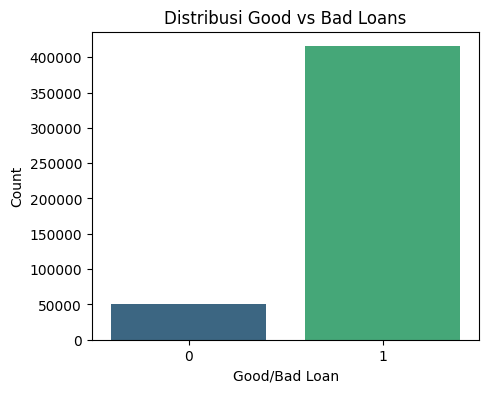

In [ ]:
# Membuat DataFrame baru untuk visualisasi
df_counts = df_final['good_bad_loan'].value_counts().reset_index()
df_counts.columns = ['good_bad_loan', 'count']

# Membuat barchart menggunakan seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='good_bad_loan', y='count', data=df_counts, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Good vs Bad Loans')
plt.xlabel('Good/Bad Loan')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

In [ ]:
# Pisahkan fitur dan target
X_oversampling = df_final.drop('good_bad_loan', axis=1)
y_oversampling = df_final['good_bad_loan']

print("Distribusi kelas sebelum oversampling:")
print(y_oversampling.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_oversampling, y_oversampling)

# Membuat DataFrame baru dengan data yang sudah diresampling
df_sampling = pd.DataFrame(X_resampled, columns=X_oversampling.columns)
df_sampling['good_bad_loan'] = y_resampled

Distribusi kelas sebelum oversampling:
good_bad_loan
1    415317
0     50968
Name: count, dtype: int64


In [ ]:
df_sampling['good_bad_loan'].value_counts()

good_bad_loan
1    415317
0    415317
Name: count, dtype: int64

<ipython-input-74-22cb0fbf3c7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='good_bad_loan', y='count', data=df_counts, palette='viridis')


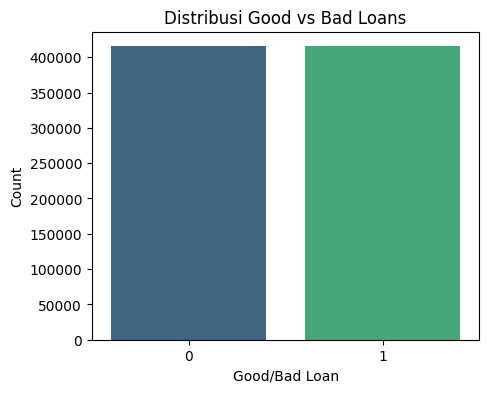

In [ ]:
# Membuat DataFrame baru untuk visualisasi
df_counts = df_sampling['good_bad_loan'].value_counts().reset_index()
df_counts.columns = ['good_bad_loan', 'count']

# Membuat barchart menggunakan seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='good_bad_loan', y='count', data=df_counts, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Good vs Bad Loans')
plt.xlabel('Good/Bad Loan')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

# Feature Scalling dengan Standarization

In [ ]:
df_sampling.head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,...,tot_cur_bal,total_rev_hi_lim,int_emp_length,new_term,new_earliest_cr_line,new_issue_d_date,new_last_pymnt_d,new_next_pymnt_d_date,new_last_credit_pull_d_date,good_bad_loan
0,1,5,2,1,3,0,5000,5000,4975.0,10.65,...,0.0,0.0,10.0,36.0,388.0,70.709677,34.0,0.0,23.0,1
1,2,5,1,0,10,0,2500,2500,2500.0,15.27,...,0.0,0.0,0.0,60.0,220.0,70.709677,55.0,0.0,50.0,0
2,2,5,0,11,14,0,2400,2400,2400.0,15.96,...,0.0,0.0,10.0,36.0,189.0,70.709677,41.0,0.0,23.0,1
3,2,5,1,9,4,0,10000,10000,10000.0,13.49,...,0.0,0.0,10.0,36.0,257.0,70.709677,34.0,0.0,34.0,1
4,1,5,1,9,36,0,3000,3000,3000.0,12.69,...,0.0,0.0,1.0,60.0,258.0,70.709677,23.0,22.0,23.0,1


In [ ]:
# Memisahkan features dengan target
features = df_sampling.drop('good_bad_loan', axis=1)
target = df_sampling['good_bad_loan']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi pada data fitur
scaled_features = scaler.fit_transform(features)

# Membuat data frame baru dengan data yang telah di-scaled
df_scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

# Menggabungkan kembali fitur yang telah di-scaled dengan kolom target
df_scaled = pd.concat([df_scaled_features, target.reset_index(drop=True)], axis=1)

In [ ]:
df_scaled.head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,...,tot_cur_bal,total_rev_hi_lim,int_emp_length,new_term,new_earliest_cr_line,new_issue_d_date,new_last_pymnt_d,new_next_pymnt_d_date,new_last_credit_pull_d_date,good_bad_loan
0,-0.736795,1.135834,1.316855,-0.716195,-1.410731,-0.567801,-1.138962,-1.137391,-1.124030,-0.980987,...,-0.763788,-0.753152,1.251708,-0.704321,1.962916,1.318802,-0.043784,-0.691113,-0.547112,1
1,0.064363,1.135834,0.051827,-1.149104,-0.897432,-0.567801,-1.441784,-1.440719,-1.423126,0.120942,...,-0.763788,-0.753152,-1.608482,1.575351,-0.179093,1.318802,1.485057,-0.691113,2.146338,0
2,0.064363,1.135834,-1.213202,3.612897,-0.604118,-0.567801,-1.453897,-1.452853,-1.435211,0.285516,...,-0.763788,-0.753152,1.251708,-0.704321,-0.574344,1.318802,0.465830,-0.691113,-0.547112,1
3,0.064363,1.135834,0.051827,2.747079,-1.337403,-0.567801,-0.533319,-0.530733,-0.516773,-0.303611,...,-0.763788,-0.753152,1.251708,-0.704321,0.292659,1.318802,-0.043784,-0.691113,0.550220,1
4,-0.736795,1.135834,0.051827,2.747079,1.009107,-0.567801,-1.381220,-1.380054,-1.362703,-0.494421,...,-0.763788,-0.753152,-1.322463,1.575351,0.305409,1.318802,-0.844605,1.121453,-0.547112,1


# Correlation Matrix

<Axes: >

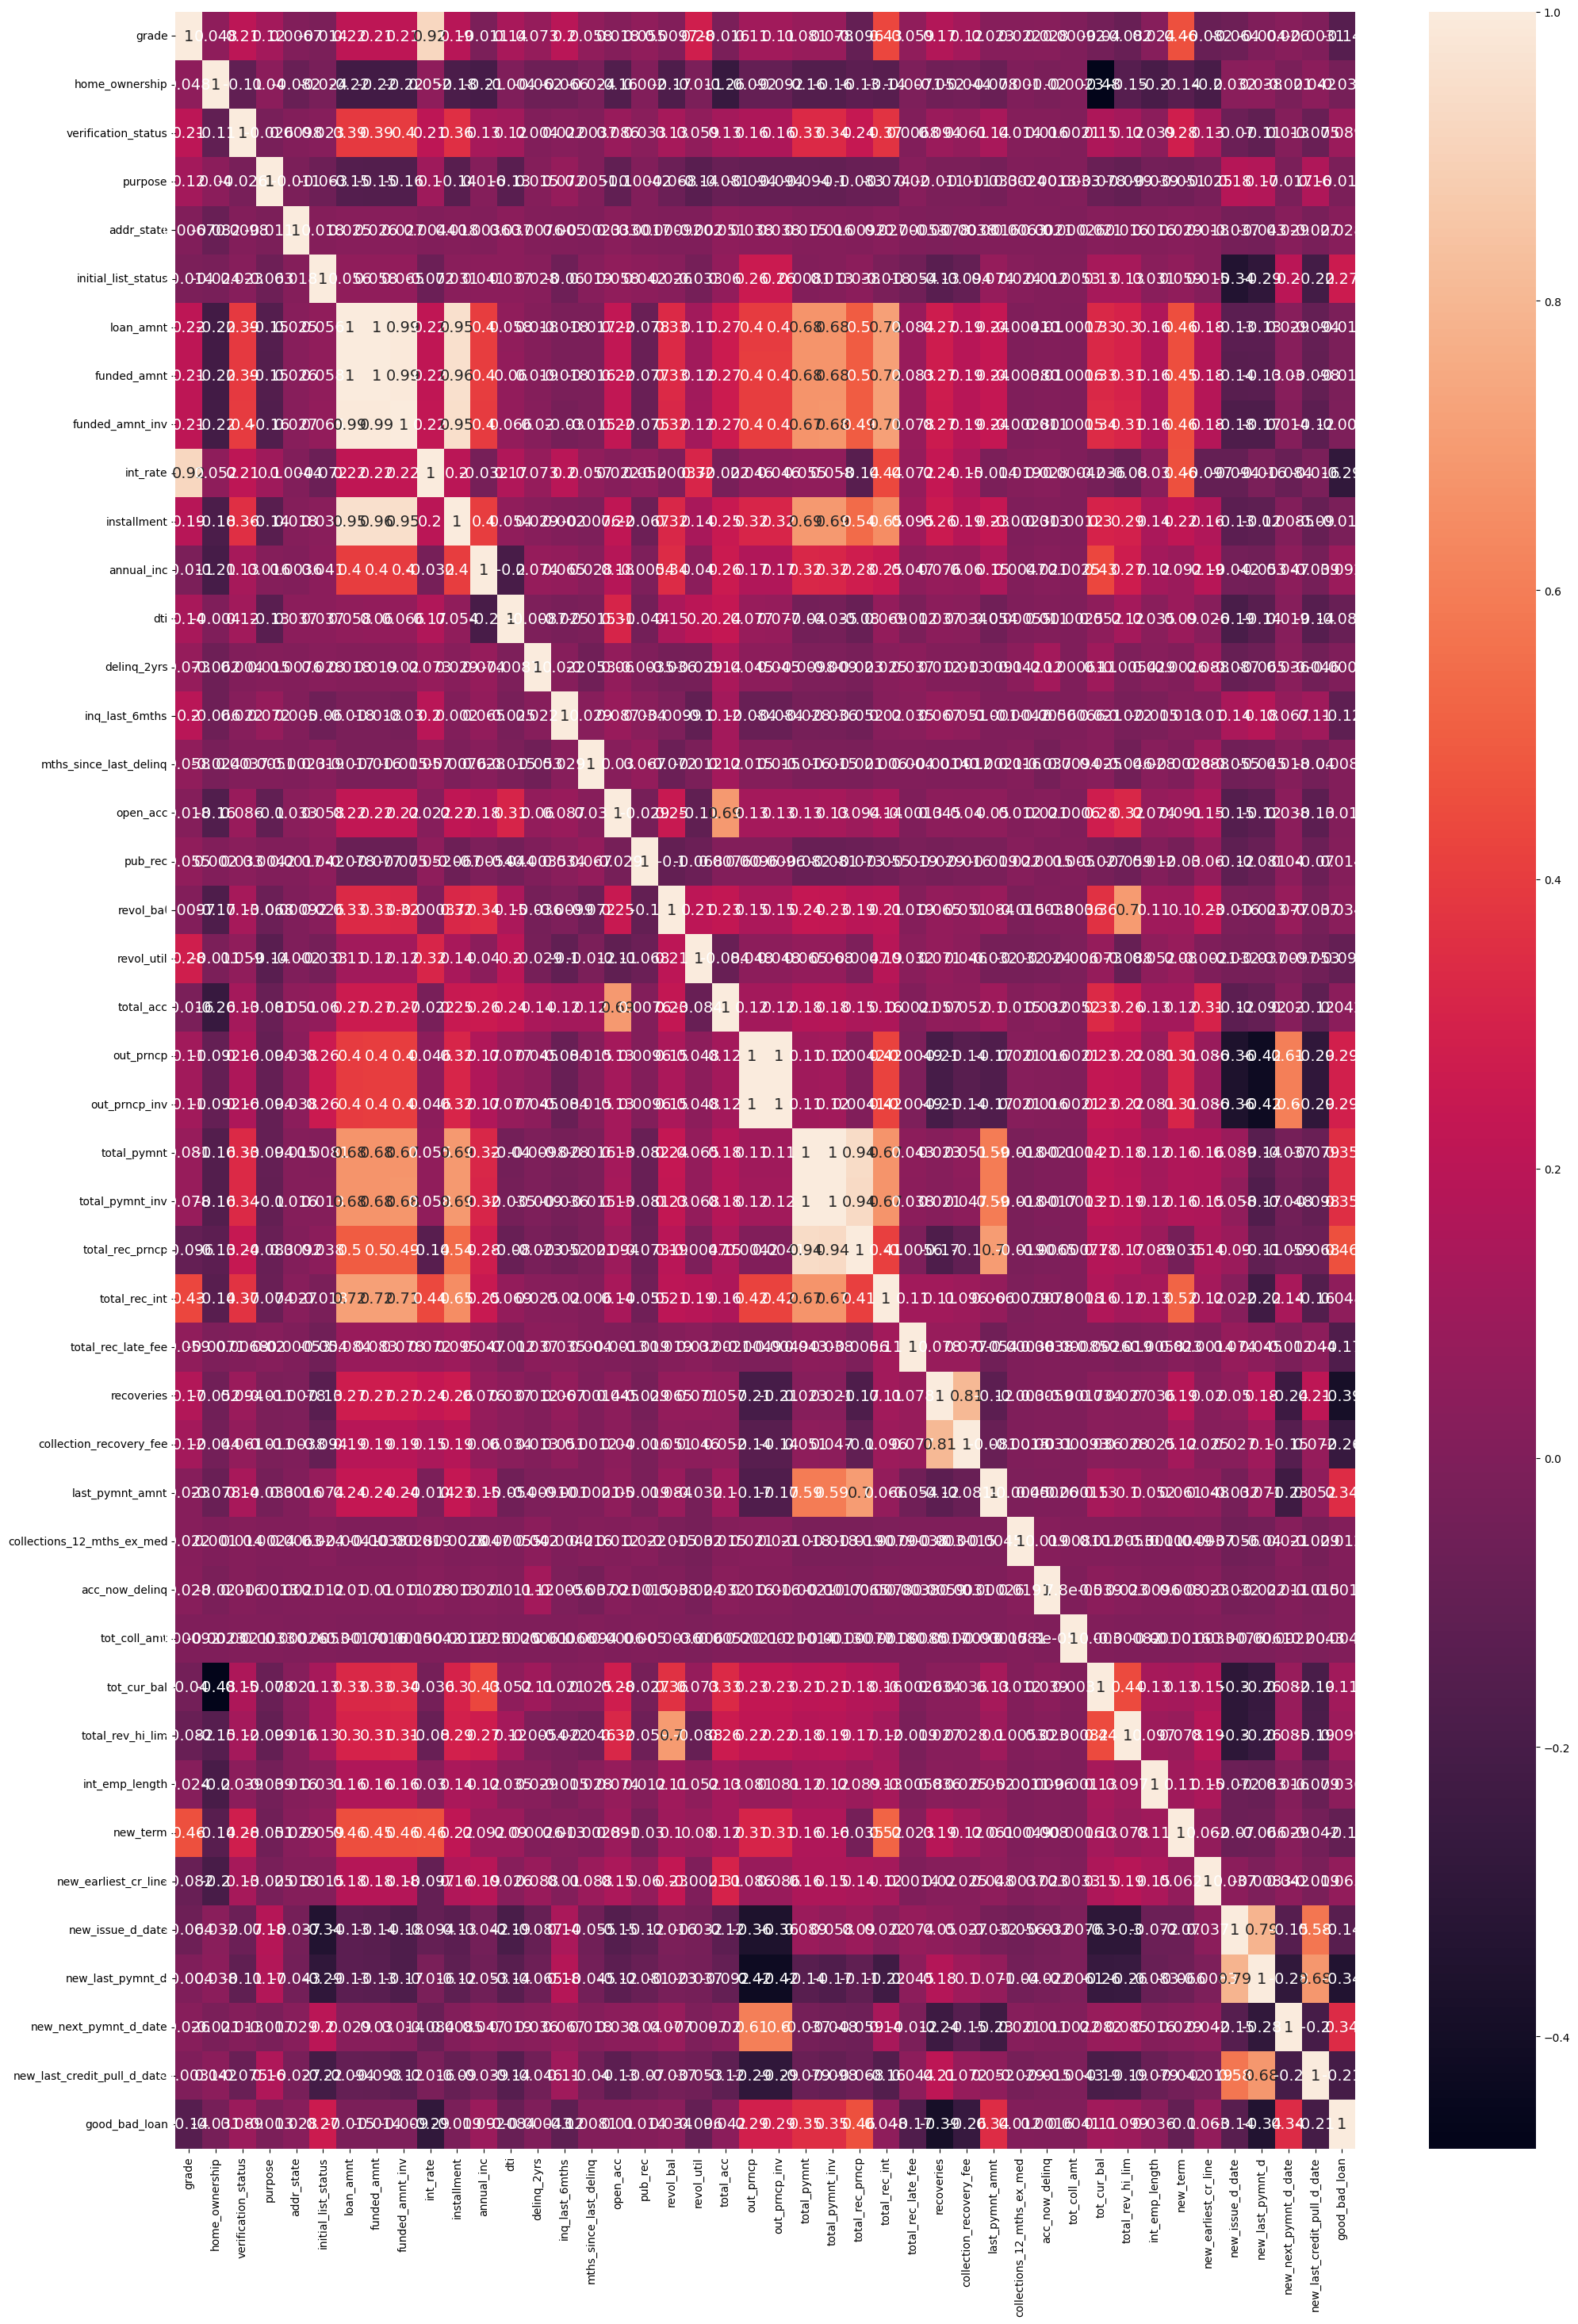

In [ ]:
#Check correlation
plt.figure(figsize=(24,35))
sns.heatmap(df_scaled.corr(), annot=True, annot_kws={'size':14})

In [ ]:
#sort the correlation
correlation = df_scaled.corr()
correlation['good_bad_loan'].sort_values(ascending=False)

good_bad_loan                  1.000000
total_rec_prncp                0.462808
total_pymnt_inv                0.349889
total_pymnt                    0.349427
last_pymnt_amnt                0.342493
new_next_pymnt_d_date          0.340222
out_prncp                      0.287605
out_prncp_inv                  0.287581
initial_list_status            0.266437
tot_cur_bal                    0.112874
total_rev_hi_lim               0.099216
annual_inc                     0.091786
verification_status            0.089471
new_earliest_cr_line           0.063039
total_rec_int                  0.048401
total_acc                      0.041861
int_emp_length                 0.036256
revol_bal                      0.034021
addr_state                     0.028143
pub_rec                        0.014479
collections_12_mths_ex_med     0.012089
open_acc                       0.010142
mths_since_last_delinq         0.008139
tot_coll_amt                   0.004102
acc_now_delinq                 0.001576


In [ ]:
# Memilih 20 korelasi terbaik

columns_in_order = [
    'total_rec_prncp',
    'total_pymnt_inv',
    'total_pymnt',
    'last_pymnt_amnt',
    'new_next_pymnt_d_date',
    'out_prncp',
    'out_prncp_inv',
    'grade',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'dti',
    'funded_amnt_inv',
    'new_earliest_cr_line',
    'total_rec_int',
    'initial_list_status',
    'int_emp_length',
    'revol_util',
    'installment',
    'revol_bal',
    'good_bad_loan'
]

# Selecting the columns from the existing DataFrame
df_scaled = df_scaled[columns_in_order]

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830634 entries, 0 to 830633
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   total_rec_prncp        830634 non-null  float64
 1   total_pymnt_inv        830634 non-null  float64
 2   total_pymnt            830634 non-null  float64
 3   last_pymnt_amnt        830634 non-null  float64
 4   new_next_pymnt_d_date  830634 non-null  float64
 5   out_prncp              830634 non-null  float64
 6   out_prncp_inv          830634 non-null  float64
 7   grade                  830634 non-null  float64
 8   tot_cur_bal            830634 non-null  float64
 9   total_rev_hi_lim       830634 non-null  float64
 10  dti                    830634 non-null  float64
 11  funded_amnt_inv        830634 non-null  float64
 12  new_earliest_cr_line   830634 non-null  float64
 13  total_rec_int          830634 non-null  float64
 14  initial_list_status    830634 non-nu

# splitting Data

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x = df_scaled.drop('good_bad_loan', axis = 1)
y = df_scaled['good_bad_loan']

# membuat x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model Trainning

## Logistic Regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_score_log_reg = log_reg.decision_function(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9382941966086187
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     83020
           1       0.90      0.99      0.94     83107

    accuracy                           0.94    166127
   macro avg       0.94      0.94      0.94    166127
weighted avg       0.94      0.94      0.94    166127

Confusion Matrix:
 [[73675  9345]
 [  906 82201]]


## XGBoost

In [ ]:
# XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_score_xgb = xgb_clf.predict_proba(X_test)
print("\nXGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.9859926441818608
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     83020
           1       0.97      1.00      0.99     83107

    accuracy                           0.99    166127
   macro avg       0.99      0.99      0.99    166127
weighted avg       0.99      0.99      0.99    166127

Confusion Matrix:
 [[80797  2223]
 [  104 83003]]


## Random Forest

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_score_rf = rf_clf.predict_proba(X_test)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9813937529721237
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     83020
           1       0.97      1.00      0.98     83107

    accuracy                           0.98    166127
   macro avg       0.98      0.98      0.98    166127
weighted avg       0.98      0.98      0.98    166127

Confusion Matrix:
 [[80243  2777]
 [  314 82793]]


# Hyperparameter Tuning

## Logistic Regression

In [ ]:
# Logistic Regression
'''
log_reg = LogisticRegression(random_state=42)
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
y_pred_log_reg = log_reg_grid.predict(X_test)
print("Logistic Regression:")
print(f"Best Parameters: {log_reg_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
'''

## XGBoost

In [ ]:
# XGBoost
'''
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)
print("\nXGBoost:")
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
'''

## Random Forest

In [ ]:
# Random Forest
'''
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
print("\nRandom Forest:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
'''